<a name="top"> </a>

## Contents

* [Setup](#Setup)
* [References](#References)
* [ZDT1](#ZDT1)
* [ZDT2](#ZDT2)
* [ZDT3](#ZDT3)
* [ZDT4](#ZDT4)
* [ZDT4P](#ZDT4P)
* [ZDT6](#ZDT6)
* [FON](#FON)

<a id="top"></a>

## Setup

In this notebook, we will run the MOCMA optimizer for functions in the ZDT benchmark and the FON function.
For the ZDT functions, an analytical form of the optimal Pareto front [is known](https://sop.tik.ee.ethz.ch/download/supplementary/testproblems/).

For each function, we will run 4 different configurations of the MOCMA optimizer for 5 trials. At each trial the optimizer will stop until a maximum number of iterations is reached or if the target volume (based on the [known maximum hypervolume](https://sop.tik.ee.ethz.ch/download/supplementary/testproblems/) for various population sizes) is surpassed.

In [3]:
import dataclasses

import math
import numpy as np

from anguilla.fitness import benchmark

from experiment import TrialParameters, run_trials, population_plot_2d, runtime_summary, volume_summary

In [12]:
# 1) Configurable global settings

# Number of trials
N_TRIALS = 5

# Number of dimensions
N_DIMENSIONS = 30

# Number of parents
N_PARENTS = 20

# For reproducible results we set a base seed to create the seed 
# sequence used to generate children seeds for each independent trial
SEED = 84574962

# Maximum number of evaluations to run the optimizer for
MAX_EVALUATIONS = 50000

# Truncate the maximum known hypervolume value to this number of decimal digits
VOLUMES_N_DIGITS = 4

# Reference point used for the known maximum hypervolume values
REFERENCE = np.array([11., 11.])

# 2) Other global values

# We store target hypervolumes for each function in the benchmark.

VOLUMES = {}
VOLUMES["zdt1"] = {2: 120.024876, 3: 120.387728, 4: 120.491597, 5: 120.539729, 10: 120.613761, 
                   20: 120.642396, 50: 120.657446, 100: 120.662137}
VOLUMES["zdt2"] = {2: 120.000000, 3: 120.148148, 4: 120.204159, 5: 120.233907, 10: 120.286820,
                   20: 120.310699, 50: 120.324398, 100: 120.328881, 1000: 120.332834}
VOLUMES["zdt3"] = {2: 127.996445, 3: 128.448485, 4: 128.598233, 5: 128.665669, 10: 128.748470,
                  20: 128.765657, 50: 128.773637, 100: 128.775955, 1000: 128.777722}
VOLUMES["zdt4"] = {2: 120.024876, 3: 120.387728, 4: 120.491597, 5: 120.539729, 10: 120.613761,
                  20: 120.642396, 50: 120.657446, 100: 120.662137, 1000: 120.666177}
VOLUMES["zdt6"] = {2: 117.248947, 3: 117.372314, 4: 117.417899, 5: 117.441742, 10: 117.483246,
                  20: 117.501440, 50: 117.511658, 100: 117.514950, 1000: 117.517870}

# Helper functions
def truncate(value, n_digits=VOLUMES_N_DIGITS):
    tmp = 10 ** n_digits
    value = math.trunc(value * tmp)
    return value / tmp

# Store common parameters which are customized using dataclasses.replace
def get_base_params(fn_cls, key):
    target_volume = None
    if key in VOLUMES:
        target_volume = truncate(VOLUMES[key][N_PARENTS])

    return TrialParameters(
                fn_cls,
                fn_args=(N_DIMENSIONS,),
                n_parents=N_PARENTS,
                max_evaluations=MAX_EVALUATIONS,
                target_indicator_value=target_volume,
                reference=REFERENCE,
            )

PARAMETERS = {}
PARAMETERS["zdt1"] = get_base_params(benchmark.ZDT1, "zdt1")
PARAMETERS["zdt2"] = get_base_params(benchmark.ZDT2, "zdt2")
PARAMETERS["zdt3"] = get_base_params(benchmark.ZDT3, "zdt3")
PARAMETERS["zdt4"] = get_base_params(benchmark.ZDT4, "zdt4")
PARAMETERS["zdt4p"] = get_base_params(benchmark.ZDT4P, "zdt4")
PARAMETERS["zdt6"] = get_base_params(benchmark.ZDT6, "zdt6")
PARAMETERS["fon"] = get_base_params(benchmark.FON, "fon")

def run(key, **parameter_replacements):
    params = dataclasses.replace(PARAMETERS[key], **parameter_replacements)
    results = run_trials(params, seed=SEED, n_trials=N_TRIALS)
    runtime_summary(results)
    volume_summary(results)
    return population_plot_2d(results)

## ZDT1
[Back to top](#top)

### Individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 87.22s, ask = 77.32s, tell = 5.65s, eval = 4.25s
HV with reference point ([11. 11.]) and target value (1.206423E+02):
 max. = 1.206354E+02, median = 1.206352E+02, min. = 1.206339E+02


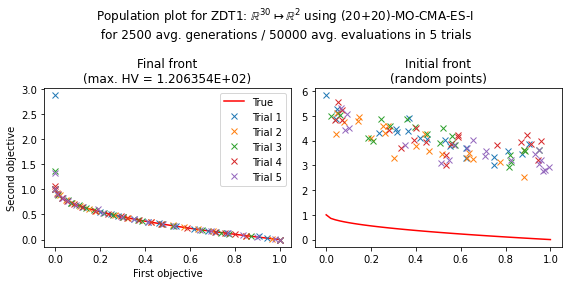

In [5]:
fig = run("zdt1", success_notion="individual")

### Population-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 24.21s, ask = 18.93s, tell = 3.09s, eval = 2.19s
HV with reference point ([11. 11.]) and target value (1.206423E+02):
 max. = 1.206368E+02, median = 1.206349E+02, min. = 1.206293E+02


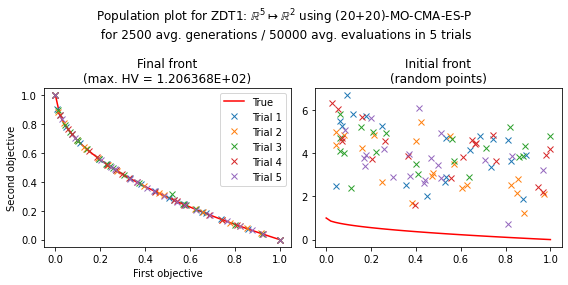

In [4]:
fig = run("zdt1")

### Steady-state, individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 8.86s, ask = 4.38s, tell = 2.89s, eval = 1.59s
HV with reference point ([11. 11.]) and target value (1.206423E+02):
 max. = 1.206423E+02, median = 1.206423E+02, min. = 1.206423E+02


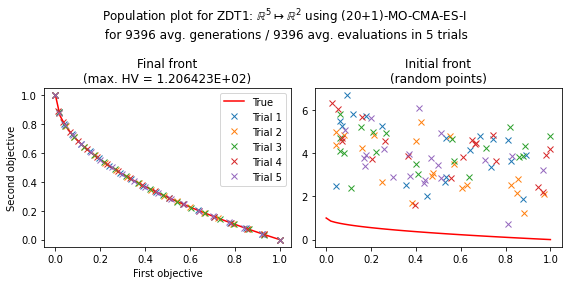

In [5]:
fig = run("zdt1", success_notion="individual", n_offspring=1)

### Steady-state, population-based

We observe that the steady-state using the population-based notion of success reaches the target volume faster than the other 3 variants and achieves better distribution.

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 6.25s, ask = 3.10s, tell = 2.02s, eval = 1.13s
HV with reference point ([11. 11.]) and target value (1.206423E+02):
 max. = 1.206423E+02, median = 1.206423E+02, min. = 1.206423E+02


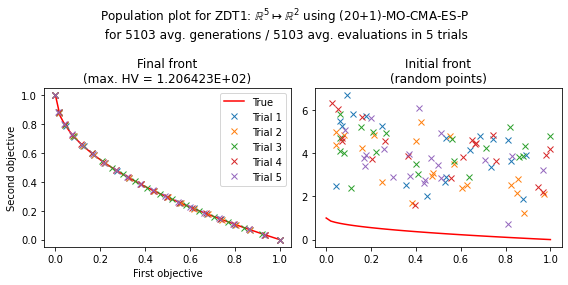

In [6]:
fig = run("zdt1", n_offspring=1)

## ZDT2
[Back to top](#top)

### Individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 25.97s, ask = 20.58s, tell = 3.05s, eval = 2.33s
HV with reference point ([11. 11.]) and target value (1.203106E+02):
 max. = 1.203078E+02, median = 1.203054E+02, min. = 1.202996E+02


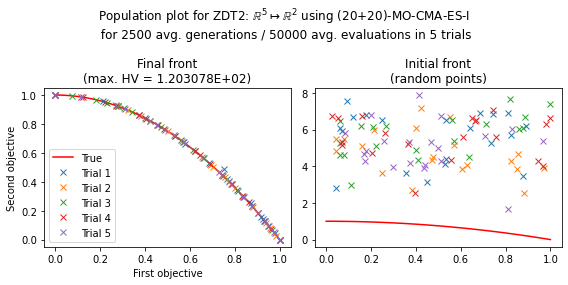

In [7]:
fig = run("zdt2", success_notion="individual")

### Population-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 35.46s, ask = 27.90s, tell = 4.43s, eval = 3.12s
HV with reference point ([11. 11.]) and target value (1.203106E+02):
 max. = 1.203084E+02, median = 1.203046E+02, min. = 1.203016E+02


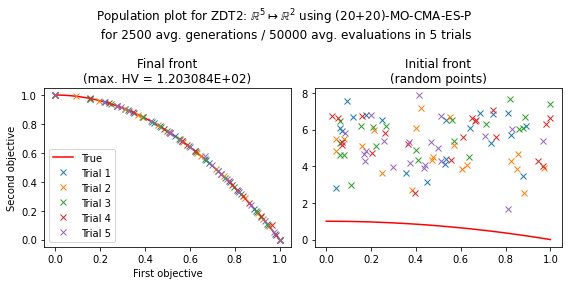

In [8]:
fig = run("zdt2")

### Steady-state, individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 41.72s, ask = 20.94s, tell = 13.35s, eval = 7.43s
HV with reference point ([11. 11.]) and target value (1.203106E+02):
 max. = 1.203106E+02, median = 1.203106E+02, min. = 1.203105E+02


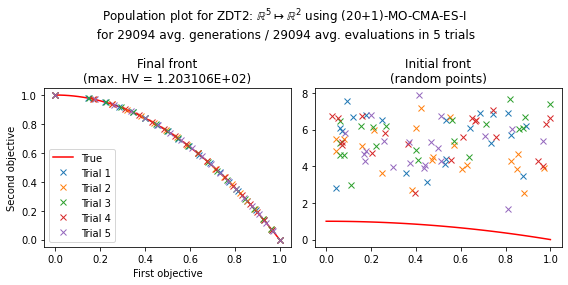

In [9]:
fig = run("zdt2", success_notion="individual", n_offspring=1)

### Steady-state, population-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 4.30s, ask = 2.10s, tell = 1.43s, eval = 0.77s
HV with reference point ([11. 11.]) and target value (1.203106E+02):
 max. = 1.203106E+02, median = 1.203106E+02, min. = 1.203106E+02


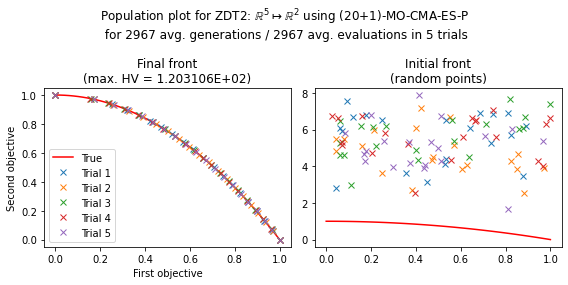

In [10]:
fig = run("zdt2", n_offspring=1)

## ZDT3
[Back to top](#top)

### Individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 29.59s, ask = 23.40s, tell = 3.44s, eval = 2.75s
HV with reference point ([11. 11.]) and target value (1.287656E+02):
 max. = 1.287636E+02, median = 1.287599E+02, min. = 1.287533E+02


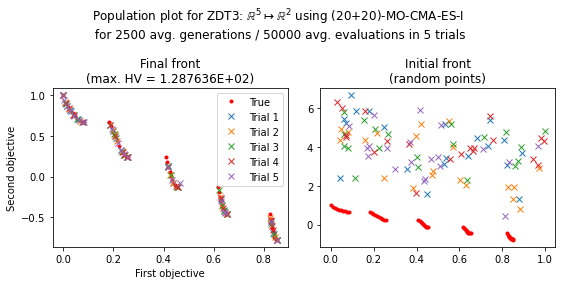

In [11]:
fig = run("zdt3", success_notion="individual")

### Population-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 24.94s, ask = 19.71s, tell = 2.92s, eval = 2.31s
HV with reference point ([11. 11.]) and target value (1.287656E+02):
 max. = 1.287621E+02, median = 1.287596E+02, min. = 1.287523E+02


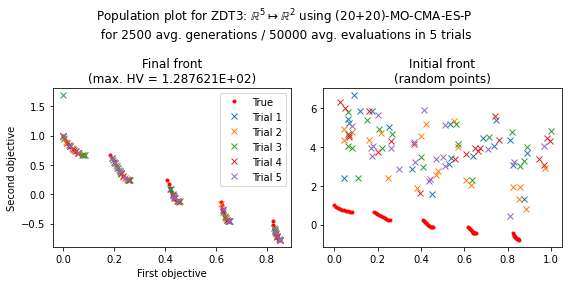

In [12]:
fig = run("zdt3")

### Steady-state, individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 32.24s, ask = 15.97s, tell = 10.16s, eval = 6.11s
HV with reference point ([11. 11.]) and target value (1.287656E+02):
 max. = 1.287656E+02, median = 1.287656E+02, min. = 1.287655E+02


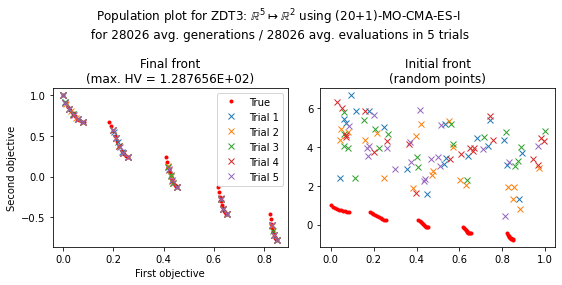

In [13]:
fig = run("zdt3", success_notion="individual", n_offspring=1)

### Steady-state, population-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 35.82s, ask = 17.77s, tell = 11.16s, eval = 6.90s
HV with reference point ([11. 11.]) and target value (1.287656E+02):
 max. = 1.287656E+02, median = 1.287656E+02, min. = 1.287655E+02


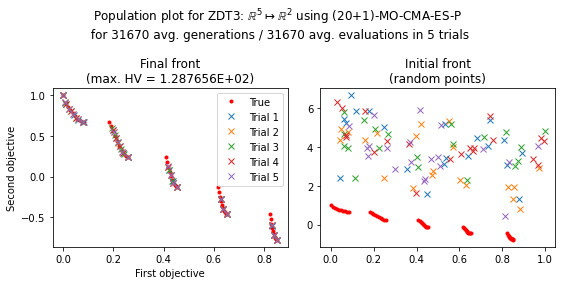

In [14]:
fig = run("zdt3", n_offspring=1)

## ZDT4
[Back to top](#top)

### Individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 27.90s, ask = 22.38s, tell = 2.98s, eval = 2.54s
HV with reference point ([11. 11.]) and target value (1.206423E+02):
 max. = 7.663834E+01, median = 4.935907E+01, min. = 0.000000E+00


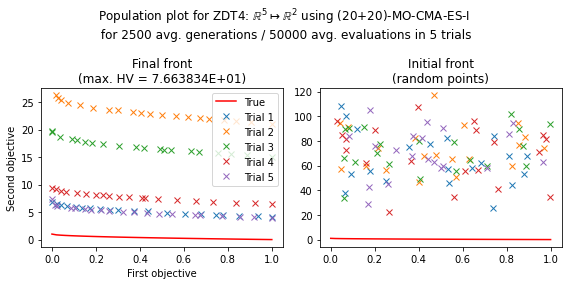

In [15]:
fig = run("zdt4", success_notion="individual")

### Population-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 36.58s, ask = 29.04s, tell = 4.24s, eval = 3.31s
HV with reference point ([11. 11.]) and target value (1.206423E+02):
 max. = 1.120615E+02, median = 3.769893E+01, min. = 0.000000E+00


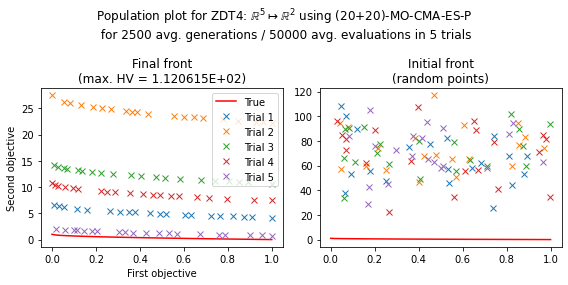

In [16]:
fig = run("zdt4")

### Steady-state, individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 69.82s, ask = 35.07s, tell = 22.52s, eval = 12.23s
HV with reference point ([11. 11.]) and target value (1.206423E+02):
 max. = 1.103146E+02, median = 8.111401E+01, min. = 0.000000E+00


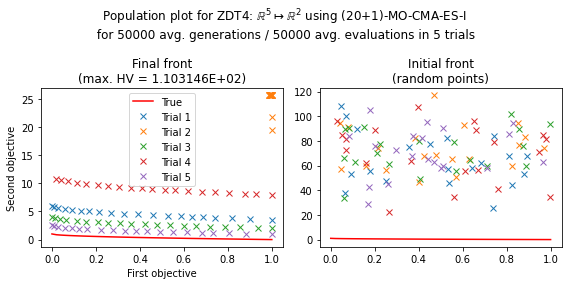

In [17]:
fig = run("zdt4", success_notion="individual", n_offspring=1)

### Steady-state, population-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 60.26s, ask = 30.68s, tell = 18.93s, eval = 10.65s
HV with reference point ([11. 11.]) and target value (1.206423E+02):
 max. = 1.175384E+02, median = 8.112431E+01, min. = 5.861484E+01


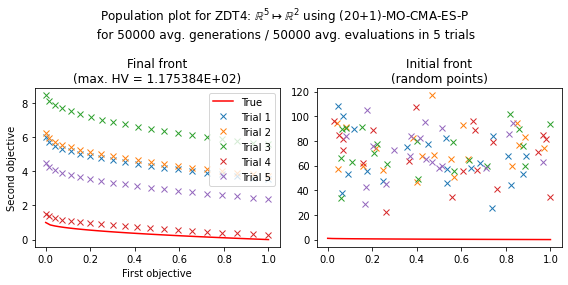

In [18]:
fig = run("zdt4", n_offspring=1)

## ZDT4P
[Back to top](#top)

### Individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 27.13s, ask = 21.26s, tell = 2.80s, eval = 3.07s
HV with reference point ([11. 11.]) and target value (1.206423E+02):
 max. = 1.023932E+02, median = 1.212600E+01, min. = 0.000000E+00


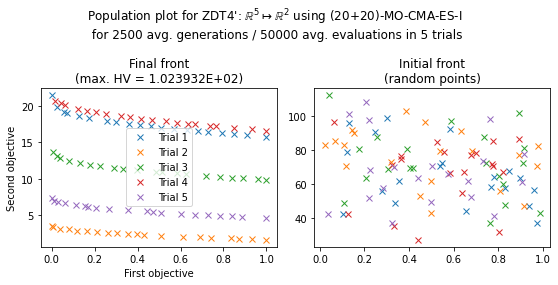

In [19]:
fig = run("zdt4p", success_notion="individual")

### Population-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 30.88s, ask = 23.95s, tell = 3.50s, eval = 3.43s
HV with reference point ([11. 11.]) and target value (1.206423E+02):
 max. = 1.175154E+02, median = 6.991829E+01, min. = 0.000000E+00


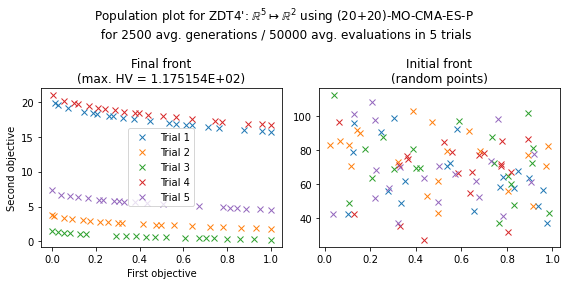

In [20]:
fig = run("zdt4p")

### Steady-state, individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 62.16s, ask = 29.57s, tell = 19.21s, eval = 13.38s
HV with reference point ([11. 11.]) and target value (1.206423E+02):
 max. = 6.996347E+01, median = 4.000907E+01, min. = 0.000000E+00


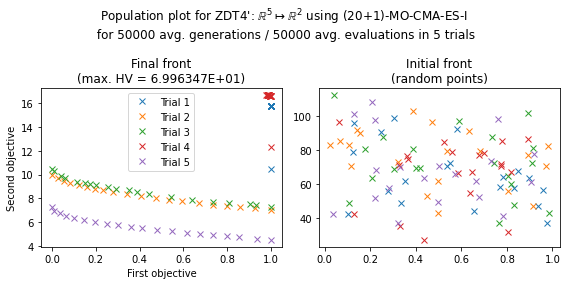

In [21]:
fig = run("zdt4p", success_notion="individual", n_offspring=1)

### Steady-state, population-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 65.26s, ask = 31.32s, tell = 19.56s, eval = 14.37s
HV with reference point ([11. 11.]) and target value (1.206423E+02):
 max. = 7.669495E+01, median = 2.605281E+01, min. = 0.000000E+00


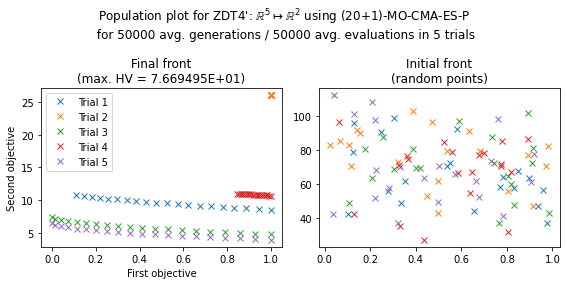

In [22]:
fig = run("zdt4p", n_offspring=1)

## ZDT6
[Back to top](#top)

### Individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 29.18s, ask = 23.08s, tell = 3.34s, eval = 2.76s
HV with reference point ([11. 11.]) and target value (1.175014E+02):
 max. = 1.174989E+02, median = 1.174978E+02, min. = 1.169883E+02


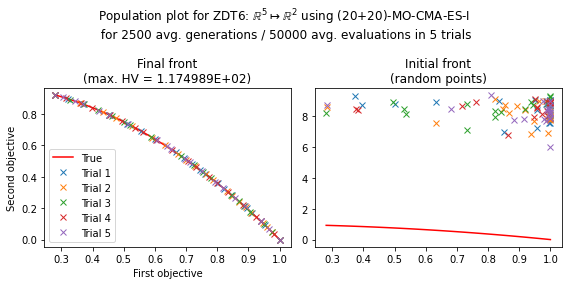

In [23]:
fig = run("zdt6", success_notion="individual")

### Population-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 26.86s, ask = 20.97s, tell = 3.28s, eval = 2.60s
HV with reference point ([11. 11.]) and target value (1.175014E+02):
 max. = 1.174966E+02, median = 1.174946E+02, min. = 1.174920E+02


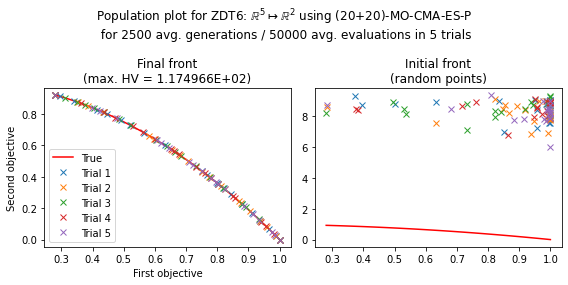

In [24]:
fig = run("zdt6")

### Steady-state, individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 60.59s, ask = 29.47s, tell = 18.78s, eval = 12.34s
HV with reference point ([11. 11.]) and target value (1.175014E+02):
 max. = 1.175014E+02, median = 1.175013E+02, min. = 1.175013E+02


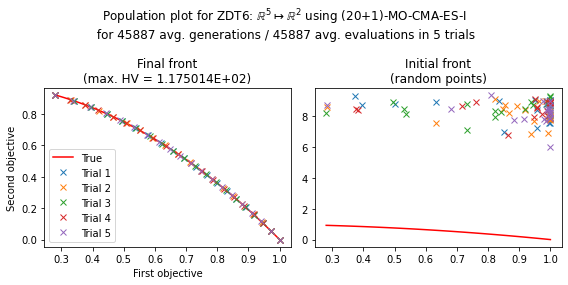

In [25]:
fig = run("zdt6", success_notion="individual", n_offspring=1)

### Steady-state, population-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 8.04s, ask = 3.89s, tell = 2.48s, eval = 1.66s
HV with reference point ([11. 11.]) and target value (1.175014E+02):
 max. = 1.175014E+02, median = 1.175014E+02, min. = 1.175014E+02


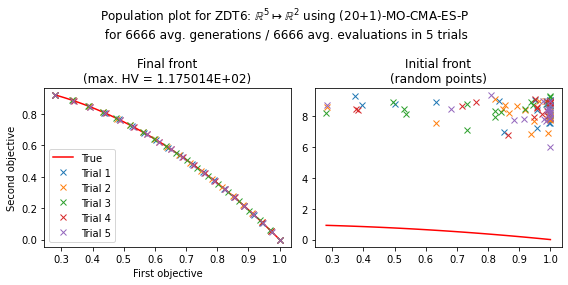

In [26]:
fig = run("zdt6", n_offspring=1)

## FON
[Back to top](#top)

### Individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 22.79s, ask = 18.32s, tell = 2.36s, eval = 2.11s
No reference point was provided.


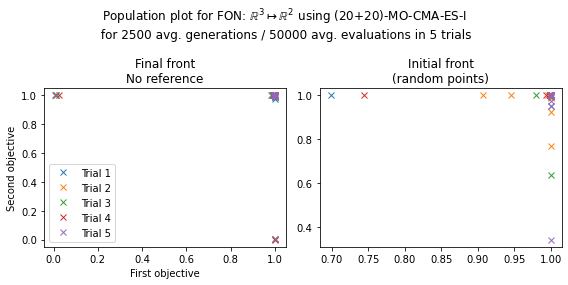

In [17]:
fig = run("fon", success_notion="individual", fn_args=(3,), reference=None)

### Population-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 22.69s, ask = 18.06s, tell = 2.64s, eval = 2.00s
No reference point was provided.


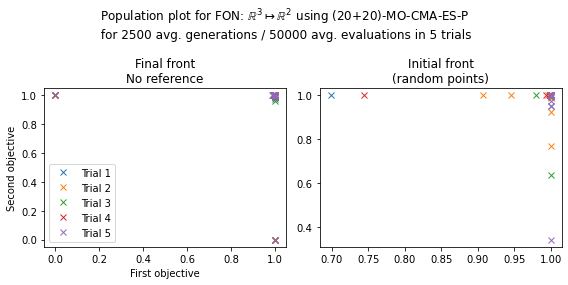

In [18]:
fig = run("fon", fn_args=(3,), reference=None)

### Steady-state, individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 66.67s, ask = 33.45s, tell = 21.49s, eval = 11.73s
No reference point was provided.


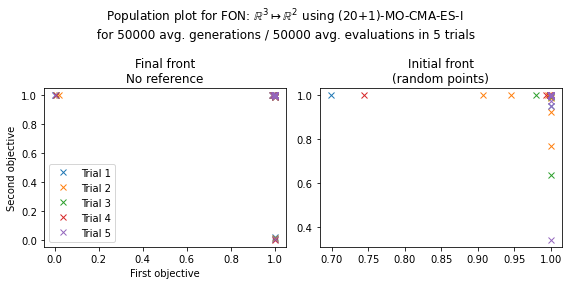

In [19]:
fig = run("fon", success_notion="individual", n_offspring=1, fn_args=(3,), reference=None)

### Steady-state, population-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 53.79s, ask = 27.38s, tell = 16.85s, eval = 9.56s
No reference point was provided.


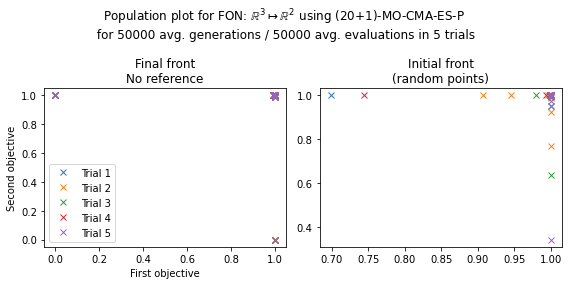

In [20]:
fig = run("fon", n_offspring=1, fn_args=(3,), reference=None)

## References

[Back to top](#top)

[1] Zitzler, E., Deb, K., Thiele, L. Comparison of multiobjective evolutionary algorithms: Empirical results. Evolutionary computation, 2000, vol. 8, no 2, p. 173-195.
[2] C. Igel, N. Hansen, and S. Roth. Covariance matrix adaptation for multi-objective optimization. Evolutionary Computation, 15(1):1–28, 2007. doi:10.1162/evco.2007.15.1.1.